<a href="https://colab.research.google.com/github/looonnk/Stuff/blob/main/fa23_project_handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digits Neural Network

We saw in class how a neural network can learn to recognize handwritten digits. Now, let's see how we can actually code that up in varying degrees of abstraction:
- using raw Python (besides calculating the actual gradients, for which we'll just use Pytorch, since we don't assume calculus knowledge. If you know calculus you're free to implement this part yourself as well)
- using Pytorch
- using Fastai

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.2 MB/s eta 0:00:00
Mounted at /content/gdrive


## First: A review of Neural Networks and Gradient Descent

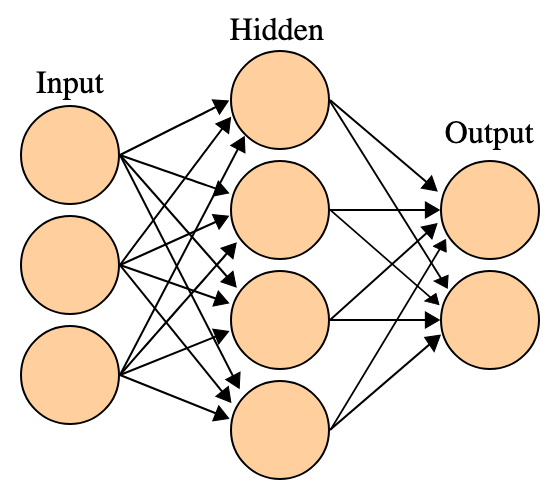

## Neural Networks
- **Input Layer**: Receives and passes the input data (i.e pixel values) to the subsequent layers.
- **Hidden Layer(s)**: Layers between the input and output layers. They process the input data and extract relevant **features**.
- **Output Layer**: Produces the final output or prediction based on the processed information from the hidden layers.
- **Weights and Biases**: Each connection between neurons has an associated weight, and each neuron has a bias. During training, the neural network adjusts these parameters to learn from the input data and improve its performance via gradient descent.

Recall the activation equation:

Activation of current neuron = weights of previous neurons * activations of previous neurons, plus your bias, all wrapped in a sigmoid. Mathematically, that can be expressed precisely using this notation:

(If you haven't seen the weird looking inverted E before, search up how to read sigma notation, it's simpler than it looks!)

![Image Description](https://miro.medium.com/v2/resize:fit:766/1*1sXY17hFy3cw-5u7mIcaAg.png)

Note that this equation happens for each individual neuron in the network. That's a lot of equations! We can express this equation happening for each neuron in a given layer all at once with a matrix.

![Image Description](https://www.scaler.com/topics/images/need-of-more-hardwares-in-dl.webp)

Here's a quick refresher for how matrix multiplication works. Let's call the matrices above: $W$, $X$, and $B$ respectively. So above we're doing $W * X + B$.

In matrix multiplication, to get $a_1$, you take each element of the first row in $W$ and multiply it with each element of the the first column in $X$. That's why you have $w_1$ * $x_1$ + $w_2$ * $x_2$ + $w_3$ * $x_3$ + $w_4$ * $x_4$.

Addition is defined more naturally - you just add entry by entry. So that's why you $+ b$ later. They show both the multiplication and addition in a single step above.

We can calculate $a_2$ and $a_3$ similarly.

This makes things easy for us when we do mathematical proofs or write code - instead of writing all these separate equations, we can just write $W * X + B$! In code, matrix multiplication is usually denoted as "@", so it'd be $W$ @ $X$ $+ B$.

Also, a nit about the diagram: really, they should label the $b$'s as $b_1$, $b_2$, and $b_3$ instead of just $b$ for all of them, since there should be three different bias terms here, not just one.

### Activation Functions

**Activation functions** are an essential component of artificial neural networks. They introduce non-linearity to the model and allow neural networks to learn complex and nonlinear patterns from the input data. Without activation functions, a neural network would simply be a series of linear transformations, which would severely limit its ability to represent and learn from diverse data patterns.

The following are important activation functions, although many more exist:
- Sigmoid
- ReLU

#### Sigmoid

The `sigmoid` function always outputs a number between 0 and 1. It's defined as follows:

In [ ]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))


Pytorch defines an accelerated version for us, so we don’t really need our own. This is an important function in deep learning, since we often want to ensure values are between 0 and 1. This is what it looks like:

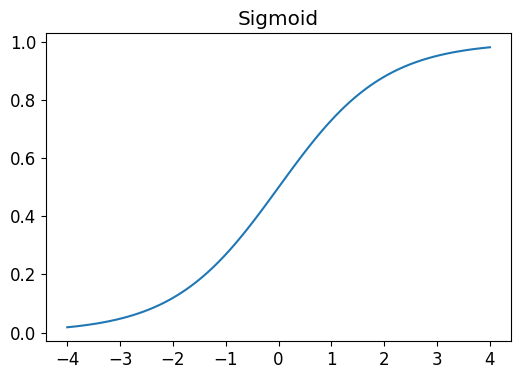

In [ ]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [ ]:
sigmoid(tensor(2))

tensor(0.8808)

As you can see, it takes any input value, positive or negative, and squishes it onto an output value between 0 and 1. It's also a smooth curve that only goes up, which makes it easier to optimize to find meaningful gradients.

#### ReLU

**ReLU** (Rectified Linear Unit) is a simple and more widely used activation function that outputs the input if it's positive and zero otherwise. It helps with the vanishing gradient problem and accelerates convergence during training. It is defined as follows:

$$\text{ReLU}(x)=\max(0, x)$$

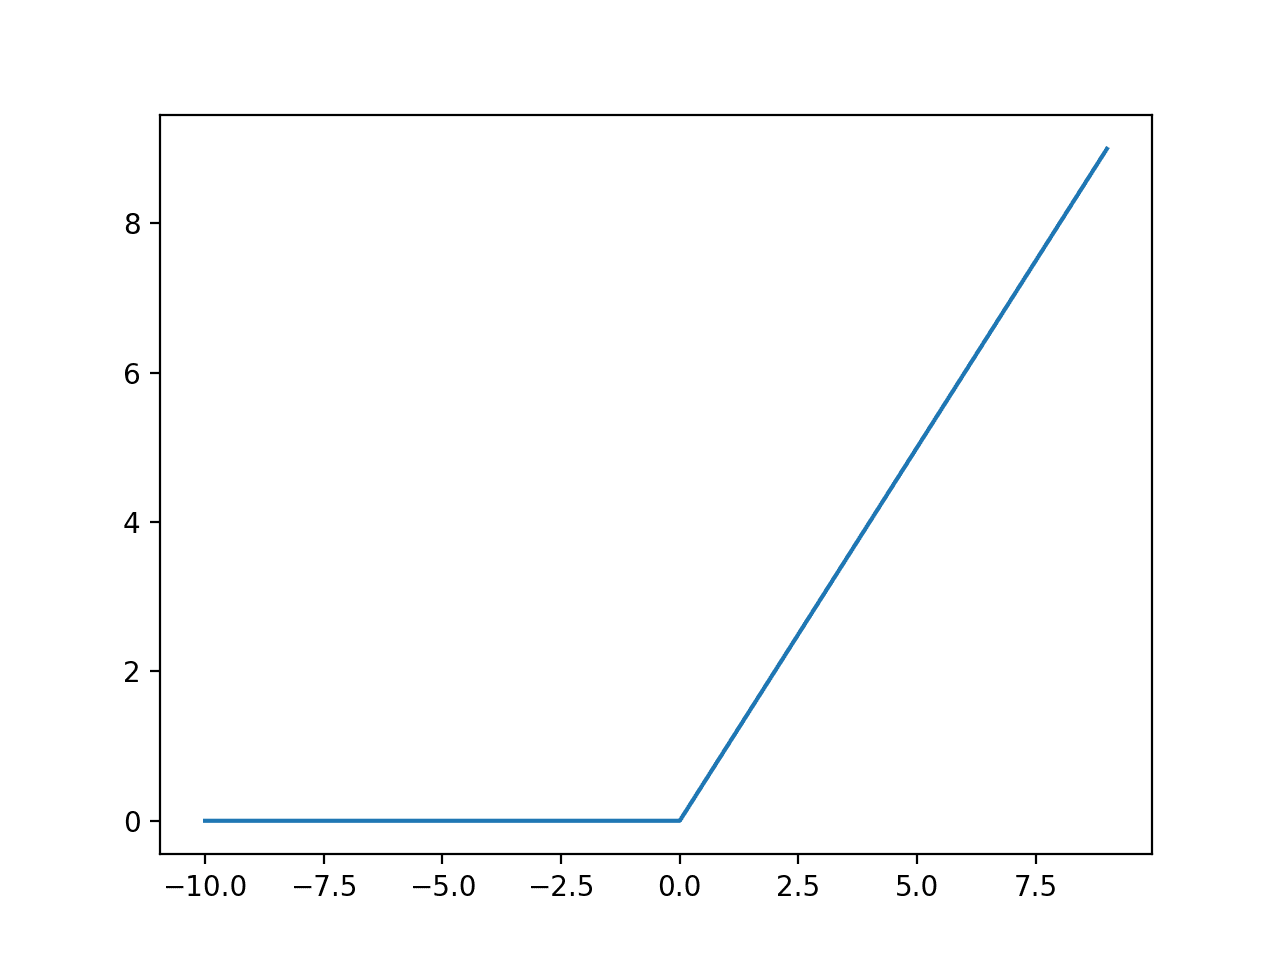

### Calculating Gradients

**Slope at a given point = Derivative.**

Gradient is the multi-dimensional analog of a derivative. All that means, is that you take the derivative of the loss with respect to each direction, and store that all into a vector.

One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative we won't get back one number, but lots of them—a gradient for every weight.

Amazingly enough, PyTorch is able to automatically compute the derivative of nearly any function! What's more, it does it very fast. Most of the time, it will be at least as fast as any derivative function that you can create by hand. Let's see an example.

First, let's pick a tensor value which we want gradients at. Don't worry too much about what "tensor" means, just think of it as a nice data structure that wraps around our data that allows Pytorch to run useful functions.

In [ ]:
# Pytorch works with tensors, so "xt" stands for x tensor.

xt = tensor(3.).requires_grad_()

In [ ]:
xt

tensor(3., requires_grad=True)

Notice the special method `requires_grad_`? That's the magical incantation we use to tell PyTorch that we want to calculate gradients with respect to that variable at that value. It is essentially tagging the variable, so PyTorch will remember to keep track of how to compute gradients of the other, direct calculations on it that you will ask for.

Now we calculate our function with that value. Notice how PyTorch prints not just the value calculated, but also a note that it has a gradient function it'll be using to calculate our gradients when needed:

In [ ]:
def f(x):
  return x**2

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

Finally, we tell PyTorch to calculate the gradients for us:

In [ ]:
yt.backward()

The "backward" here refers to **backpropagation**, which is the name given to the process of calculating the derivative of each layer. This is the algorithm that neural networks use to calculate the gradients of each of their parameters. We won't cover much more of the specifics of backpropagation in this notebook, but there are many online resources you can read that cover it in great detail.

We can now view the gradients by checking the `grad` attribute of our tensor:

In [ ]:
xt.grad

tensor(6.)

:The derivative of `x**2` is `2*x` (don't worry about how to derive that mathematically since that requires calculus knowledge), and we have `x=3`, so the gradients should be `2*3=6`, which is what PyTorch calculated for us!


### Stepping With a Learning Rate

How do you decide how much to change our parameters based on the values of the gradients? We multiply the gradient by some small number, called the *learning rate* (often denoted by $\alpha$, $\eta$, or just lr).

The learning rate is often a very small number between 0.001 and 0.1, although it could be anything. Often, people select a learning rate just by trying a few, and finding which results in the best model after training.

If you pick a learning rate that's too low, it can mean having to do a lot of steps.

<img alt="An illustration of gradient descent with a LR too low" width="400" caption="Gradient descent with low LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_small.svg?raw=1" id="descent_small"/>

But picking a learning rate that's too high is even worse—it can actually result in the loss getting *worse*.

<img alt="An illustration of gradient descent with a LR too high" width="400" caption="Gradient descent with high LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_div.svg?raw=1" id="descent_div"/>

If the learning rate is too high, it may also "bounce" around, rather than actually diverging.

<img alt="An illustation of gradient descent with a bouncy LR" width="400" caption="Gradient descent with bouncy LR" src="https://github.com/fastai/fastbook/blob/master/images/chapter2_bouncy.svg?raw=1" id="descent_bouncy"/>

# Training a Digit Classifier

## MNIST

We'll use one of the most famous datasets in computer vision, [MNIST](https://en.wikipedia.org/wiki/MNIST_database), for our experiments. MNIST contains images of handwritten digits, by Yann Lecun (now, Chief AI scientist at Meta. Also known for some incredibly hot takes on twitter.). Lecun used MNIST in 1998 in [Lenet-5](http://yann.lecun.com/exdb/lenet/), the first computer system to demonstrate practically useful recognition of handwritten digit sequences. This was one of the most important breakthroughs in the history of AI.

For this initial tutorial we are just going to try to create a model that can classify any image as a 3 or a 7. So let's download a sample of MNIST that contains images of just these digits:

In [ ]:
path = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
Path.BASE_PATH = path

We can see what's in this directory by using `ls`, a method in the fastai library. This method returns an object of a special fastai class called `L`, which has all the same functionality of Python's built-in `list`, plus a lot more. One of its handy features is that, when printed, it displays the count of items, before listing the items themselves (if there are more than 10 items, it just shows the first few):

In [ ]:
path.ls()

(#3) [Path('train'),Path('valid'),Path('labels.csv')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation set (and/or test set). Let's see what's inside the training set:

In [ ]:
(path/'train').ls()

(#2) [Path('train/3'),Path('train/7')]

There's a folder of 3s, and a folder of 7s. In machine learning parlance, we say that "3" and "7" are the *labels* (or targets) in this dataset. Let's take a look in one of these folders (using `sorted` to ensure we all get the same order of files):

In [ ]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [ ]:
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

As we might expect, it's full of image files. Let’s take a look at one now. Here’s an image of a handwritten number 3, taken from the famous MNIST dataset of handwritten numbers:

In [ ]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

**TODO**: Now, write code to view the 10th image of a seven in the dataset.

In [ ]:
im7_path = sevens[10]
im7 = Image.open(im7_path)
im7

In [ ]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

<details>
<summary>Click to view the hidden solution</summary>

```python
im7_path = sevens[10]
im7 = Image.open(im7_path)
im7


Here we are using the `Image` class from the *Python Imaging Library* (PIL), which is the most widely used Python package for opening, manipulating, and viewing images. Jupyter knows about PIL images, so it displays the image for us automatically.

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a *NumPy array* or a *PyTorch tensor*. For instance, here's what a section of the image looks like, converted to a NumPy array:

In [ ]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

The `4:10` indicates we requested the rows from index 4 (included) to 10 (not included) and the same for the columns. NumPy indexes from top to bottom and left to right, so this section is located in the top-left corner of the image. Here's the same thing as a PyTorch tensor:

In [ ]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

We can slice the array and then use a Pandas DataFrame to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values:

In [ ]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:25,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


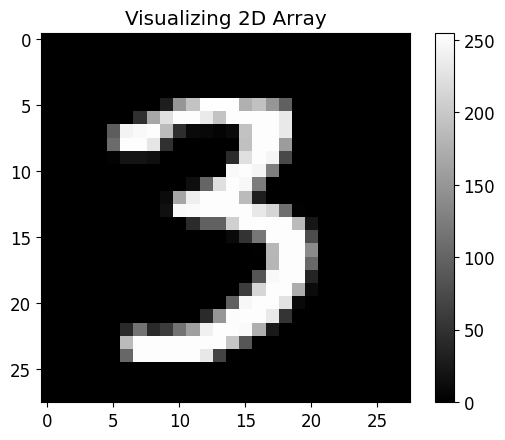

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming im3 is your 2D numpy array
# im3 = np.random.randint(0, 256, (10, 10), dtype=np.uint8)

plt.imshow(im3, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title('Visualizing 2D Array')
plt.show()


You can see that the background white pixels are stored as the number 0, black is the number 255, and shades of gray are between the two. Later, we'll "normalize" that, meaning, we'll divide by 255 so that the data is between 0 and 1.

The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our initial learning and experiments. We will build up to bigger, full-color images soon.)

So, now you've seen what an image looks like to a computer. Next, lets create a neural network that can distinguish between 3s and 7s.



## Linear model with PyTorch and FastAI

Before creating a full-on neural network, let's create a network without any hidden layers that just takes in our inputs and is connected to a single output neuron (technically, we only need one output neuron to represent two classes, since if it predicts > 0.5 for that neuron, we can predict the first class, else the second class)

This is essentially actually something called logistic regression, which we'll learn soon :).

First, let's load the data.

**TODO**: What is each line doing? Try to figure out each line via Google + Stack overflow, official documentation, or ChatGPT.

In [ ]:
# o = sevens[0]
# tensor(Image.open(o))
# seven_tensors[0:2]
# stacked_sevens[0:2]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

dset = list(zip(train_x,train_y))
dl = DataLoader(dset, batch_size=256)








valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

# Write code to stack all the images of a "7" into one tensor, similar to the threes above, then normalize it afterwards.
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

valid_dl = DataLoader(valid_dset, batch_size=256)

In [ ]:
[1] * 10

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

<details>
<summary>Click to view the hidden solution</summary>


```
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

```



In [ ]:
28*28

784

In [ ]:
train_x.shape

torch.Size([12396, 784])

Let's create a simple linear model that predicts whether an image is a 3 or a 7 using PyTorch and FastAI.

First, an introduction to PyTorch. PyTorch is an open-source machine learning library developed by Meta. It has gained immense popularity for its ease of use, flexibility, and dynamic computational graph, making it a powerful tool for building and training deep learning models.

PyTorch provides a high-level abstraction called `torch.nn.Module` that allows you to define neural network architectures layer-by-layer. You can compose different layers, activation functions, and loss functions to create sophisticated models with ease.

We'll use `nn.Linear` to create a linear layer for our neural network. It contains both the *weights* and *biases* in a single class.

**TODO:** Write code to create a linear layer with input size `28*28` and output size `1`.

In [ ]:
linear_model = nn.Linear(28*28, 1)

<details>
<summary>Click to view the hidden solution</summary>

```python
linear_model = nn.Linear(28*28,1)


Every PyTorch module knows what parameters it has that can be trained; they are available through the `parameters` method. Make sure these shapes make sense to you.

In [ ]:
w,b = linear_model.parameters()

w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

We can use this information to create an "optimizer", which will run gradient descent for us.

In `step`, we utilize the gradient descent formula: x_1 = x_0 - gradient * lr.

**TODO:** Fill in the optimizer.

In [ ]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr
        # Each parameter (called 'p' here) in self.params is an object that contains fields: 'data' and 'grad.data' containing the data and gradient data respectively.
        # You can access these per usual in Python using dot notation, e.g p.data

    def step(self):
        for p in self.params:
            # p.data -= p.grad.data * self.lr
            p.data = p.data - p.grad.data * self.lr

    def zero_grad(self): # Remember we need to zero the gradients in Pytorch, otherwise they will continue accumulating.
        for p in self.params:
            p.grad = None

<details>
<summary>Click to view the hidden solution</summary>


```
class BasicOptim:
    def __init__(self, params, lr):
        self.params, self.lr = list(params), lr

    def step(self):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self):
        for p in self.params:
            p.grad = None

```

We can create our optimizer by passing in the model's parameters:

In [ ]:
lr = 1e-5
opt = BasicOptim(linear_model.parameters(), lr)

Next, we write our training loop. MSE for our loss function doesn't make sense in this context, as our problem is categorical, not numerical. Usually we'd use cross entropy loss for categorical data, but we haven't learned that yet, so let's design our own custom loss function!

Our categories "3" and "7" are represented by the numbers '0' and '1'. We want to penalize incorrect answers heavier. One way we can achieve this is with this loss function:

```
If target == 1: set loss to 1 - prediction.

If target == 0: set loss to prediction.

```



This way, say our prediction for a '1' is 0.7. Then our loss is 0.3. Say our prediction was 0.4. Then the loss is 0.6, which is higher than 0.3. This meets our goal, since the higher loss corresponds to a worse prediction! (0.4 is worse than 0.7 since we're trying to predict a 1...). Finally, let's take the mean of the loss across all our data points.

**TODO**: Fill in this logic for `mnist_loss`, as well as the rest of the blanks. Think on a conceptual level what happens in the training loop.

In [ ]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    # Your code here
    # You can do this with for loops and if statements if you'd like. However, a better, one-line solution, is to use "torch.where". Search that up to see how to use it!
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    # Your code here: Calculate the gradient. Remember, you can do this in one line in Pytorch - what was the method we used do this for us?
    # Hint - it's named after backpropagation.
    loss.backward()

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        # Your code here - take a step with our optimizer we wrote earlier, then zero the gradient.
        opt.step()
        opt.zero_grad()

<details>
<summary>Click to view the hidden solution</summary>


```
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()
```

Let's define some helper functions to calculate accuracy.

**TODO:** Search up or use ChatGPT to understand the syntax of each line.

In [ ]:
def batch_accuracy(xb, yb): # calculates accuracy of our predictions
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

def validate_epoch(model): # calculates accuracy of our predictions for one epoch of our validation set.
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear_model)

0.4885

Let's put our little training loop in a function, to make things simpler:

**TODO:** Fill in the function

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        # Your code here - use one of the functions we just defined!
        train_epoch(model)
        print(validate_epoch(model), end=' ')

<details>
<summary>Click to view the hidden solution</summary>


```
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')
```

Now let's train our model! Let's do it for 20 epochs.

**TODO:** Call the function we just created.

In [ ]:
# Your code here
train_model(linear_model, 20)

0.4885 0.4895 0.4914 0.4919 0.4919 0.4924 0.4929 0.4934 0.4944 0.4949 0.4954 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4959 0.4964 0.4974 

<details>
<summary>Click to view the hidden solution</summary>


```
train_model(linear_model, 20)
```

fastai provides the `SGD` class, standing for Stochastic Gradient Descent, which, by default, does the same thing as our `BasicOptim`:

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4682 0.4706 0.474 0.477 0.4799 0.4809 0.4824 0.4839 0.4853 0.4863 0.4873 0.4888 0.4912 0.4937 0.4962 0.4981 0.5006 0.5011 0.5026 0.505 

fastai also provides `Learner.fit`, which we can use instead of `train_model`. To create a `Learner` we first need to create a `DataLoaders`, by passing in our training and validation `DataLoader`s:

In [ ]:
dls = DataLoaders(dl, valid_dl)

To create a `Learner` without using an application (such as `vision_learner`) we need to pass in all the elements that we've created in this chapter: the `DataLoaders`, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print (such as the `batch_accuracy`).

**TODO**: Create a fastai `Learner` (i.e a model). Search up the parameters it takes in!

In [ ]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

<details>
<summary>Click to view the hidden solution</summary>


```
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
```

Now we can call `fit`:

**TODO:** Call learn.fit for 10 epochs. Search up the parameters it takes in!

In [ ]:
# Your code here
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.473753,0.484265,0.607458,00:00
1,0.473616,0.484059,0.608440,00:00
2,0.473458,0.483854,0.610402,00:00
3,0.473286,0.483648,0.610402,00:00
4,0.473107,0.483443,0.611874,00:00
5,0.472923,0.483237,0.611874,00:00
6,0.472737,0.483032,0.613837,00:00
7,0.472550,0.482827,0.616291,00:00
8,0.472363,0.482621,0.616781,00:00
9,0.472176,0.482416,0.617272,00:00


<details>
<summary>Click to view the hidden solution</summary>


```
learn.fit(10, lr=lr)
```

As you can see, there's nothing magic about the PyTorch and fastai classes. They are just convenient pre-packaged pieces that make your life a bit easier!

With these classes, we can now replace our linear model with a neural network.

## Adding a Nonlinearity

So far we have a general procedure for optimizing the parameters of a function, and we have tried it out on a very boring function: a simple linear classifier. A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

**TODO:** (Challenge) Define a basic neural network with one hidden layer and a Relu activation function in Python. This can be done in just three lines using matrix multiplication!

Let's assume our weight tensor between the input and the hidden layer is `w1`, and the weight tensor between the hidden layer and output is `w2`. Let `b1` and `b2` be the bias tensors for the input layer and hidden layer respectively. To do matrix multiplication in Python, use "@".

In [ ]:
def simple_net(xb):
    # Your code here
    res = xb @ w1 + b1
    res = res.max(tensor(0.0))
    res = res @ w2 + b2


<details>
<summary>Click to view the hidden solution</summary>


```
def simple_net(xb):
    res = xb @ w1 + b1 # remember, @ means matrix multiplication
    res = res.max(tensor(0.0)) # this is Relu!
    res = res @ w2 + b2
    return res
```

That's it! All we have in `simple_net` is two linear classifiers with a `max` function between them.

Here, `w1` and `w2` are weight tensors, and `b1` and `b2` are bias tensors; that is, parameters that are initially randomly initialized, just like we did in the previous section. Here, our hidden layer has 30 neurons.

In [ ]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

Relu is also available in PyTorch as `F.relu`:

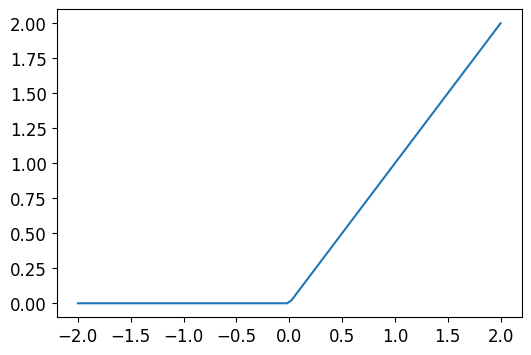

In [ ]:
plot_function(F.relu)

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as `max`, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work. The `max` function is particularly interesting, because it operates as a simple `if` statement.

Mathematically, we say the composition of two linear functions is another linear function. So, we can stack as many linear classifiers as we want on top of each other, and without nonlinear functions between them, it will just be the same as one linear classifier.

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for `w1` and `w2` and if you make these matrices big enough. For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the *universal approximation theorem*.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch.

**TODO:** Create an equivalent neural network in Pytorch. Search Google / ChatGPT for reference!

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

`nn.ReLU` is a PyTorch module that does exactly the same thing as the `F.relu` function. Most functions that can appear in a model also have identical forms that are modules. Generally, it's just a case of replacing `F` with `nn` and changing the capitalization. When using `nn.Sequential`, PyTorch requires us to use the module version. Since modules are classes, we have to instantiate them, which is why you see `nn.ReLU()` in this example.

In [ ]:
# simple_net = # Your code here
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

<details>
<summary>Click to view the hidden solution</summary>


```
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)
```

Because `nn.Sequential` is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. Let's try it out! As this is a deeper model, we'll use a lower learning rate and a few more epochs.

**TODO:** Define a fastai learner called `learn` with our `simple_net` architecture. Then train it for 40 epochs with a learning rate of 0.1. This should be more familiar now!

In [ ]:
# Your code here
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.321553,0.398654,0.509323,00:00
1,0.148813,0.229344,0.803729,00:00
2,0.082180,0.115545,0.912169,00:00
3,0.053814,0.077860,0.941609,00:00
4,0.040673,0.060659,0.958292,00:00
5,0.033984,0.051013,0.963690,00:00
6,0.030156,0.044946,0.965162,00:00
7,0.027680,0.040815,0.967615,00:00
8,0.025901,0.037830,0.969578,00:00
9,0.024526,0.035563,0.970559,00:00


<details>
<summary>Click to view the hidden solution</summary>


```
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

learn.fit(40, 0.1)
```

The training process is recorded in `learn.recorder`, with the table of output stored in the `values` attribute, so we can plot the accuracy over training as:

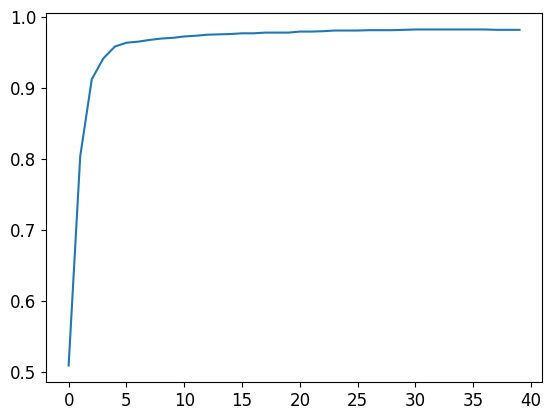

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

And we can view the final accuracy:

In [ ]:
learn.recorder.values[-1][2]

0.981844961643219

At this point we have something that is rather magical:

1. A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters
1. A way to find the best set of parameters for any function (stochastic gradient descent)

This is why deep learning can do things which seem rather magical, such fantastic things. Believing that this combination of simple techniques can really solve any problem is one of the biggest steps that we find many students have to take. It seems too good to be true—surely things should be more difficult and complicated than this? Unintuitively, this is truly that powerful! Our recommendation: try it out! We just tried it on the MNIST dataset and you have seen the results. And since we are doing everything from scratch ourselves (except for calculating the gradients) you know that there is no special magic hiding behind the scenes.

### Going Deeper

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers. As you will learn, however, the deeper the model gets, the harder it is to optimize the parameters in practice. Later in this book you will learn about some simple but brilliantly effective techniques for training deeper models.

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

That means that we can train the model more quickly, and it will take up less memory. In the 1990s researchers were so focused on the universal approximation theorem that very few were experimenting with more than one nonlinearity. This theoretical but not practical foundation held back the field for years. Some researchers, however, did experiment with deep models, and eventually were able to show that these models could perform much better in practice. Eventually, theoretical results were developed which showed why this happens. Today, it is extremely unusual to find anybody using a neural network with just one nonlinearity.

**TODO:** Use fastai to define an 18-layer Resnet architecture without pre-training. Use cross entropy loss. Search google for documentation on how to do this!

In [ ]:
dls = ImageDataLoaders.from_folder(path)
# learn = # Your code here
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)

<details>
<summary>Click to view the hidden solution</summary>


```
learn = vision_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)

```

In [ ]:
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.123772,0.020824,0.995093,00:25


Nearly 100% accuracy! That's a big difference compared to our simple neural net. There are just a few little tricks you need to use to get such great results from scratch yourself. You already know the key foundational pieces. (Of course, even once you know all the tricks, you'll nearly always want to work with the pre-built classes provided by PyTorch and fastai, because they save you having to think about all the little details yourself.)

Congratulations: you now know how to create and train a deep neural network from scratch! We've gone through quite a few steps to get to this point, but you might be surprised at how simple it really is.

Citations:
deeplearning.ai - Andrew Ng

@book{howard2020deep,
title={Deep Learning for Coders with Fastai and Pytorch: AI Applications Without a PhD},
author={Howard, J. and Gugger, S.},
isbn={9781492045526},
url={https://books.google.no/books?id=xd6LxgEACAAJ},
year={2020},
publisher={O'Reilly Media, Incorporated}
}

Ryan Campbell, Thomas Lu, Kevin Zhu - Algoverse